# Exploratory Data Analysis - Final Activity


Your goal is to carry out a K-means clustering in order to find groups within the beverage list. You will report the groups that you find to the senior consultant and restaurant chain representatives during the next meeting. 

For your deliverable, please provide a Jupyter Notebook outlining every step of your k-means clustering method. 
* Justify your choice of the number of clusters chosen
* Explain what the PCA plot shows
* Provide a description of each cluster 

## Part 1: A general look at the data

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np

# Import functions created for this course
from functions import *

# Load the data from the csv file into a Pandas Dataframe
beverages = pd.read_csv('winequality-red.csv')

# Look at the first few rows
beverages.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
#Check if there are missing values
beverages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
#see if the data is standardized
beverages.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Part 2: Standardizing the data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
B_scaled = scaler.fit_transform(beverages)
B_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

## Part 3: Performing the k-means clustering

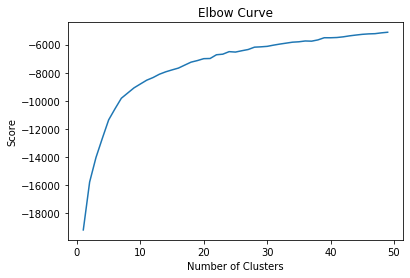

In [13]:
from sklearn.cluster import KMeans

# We start by looking at the elbow curve to see how many clusters will be needed

# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(B_scaled).score(B_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Based on our elbow curve, it makes sense to use 7 or 8 clusters. 
For the rest of our analysis, we will use 8.

In [16]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=8, n_init=10)

# Fit the data to the model
kmeans.fit(B_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(B_scaled)

In [19]:
# out of curiosity, let's look at the size of our clusters
# For this we need to insert the cluster column in the original table

B_scaled_clustered = pd.DataFrame(B_scaled, columns=beverages.columns)
B_scaled_clustered['cluster'] = clusters

B_scaled_clustered["cluster"].value_counts()

6    305
0    300
2    272
5    242
4    210
3    195
1     46
7     29
Name: cluster, dtype: int64

We can see that the clustering has divided the wines into 8 categories, 6 of which have around 200-300 wines, and 2 that have much less. Based on our elbow curve, these 8 clusters should be enough to have sufficiently close wine profiles within each cluster.

## Part 4: Reducing the number of dimensions through PCA

In [22]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(B_scaled)

# Transform the scaled data to the new PCA space
B_reduced = pca.transform(B_scaled)

# Convert to a data frame
B_reduceddf = pd.DataFrame(B_reduced, columns=['PC1','PC2'])
B_reduceddf['cluster'] = clusters
B_reduceddf.head()


,PC1,PC2,cluster
0,-1.779442,1.157303,0
1,-1.004185,2.071838,0
2,-0.915783,1.393434,0
3,2.404077,-0.213792,3
4,-1.779442,1.157303,0


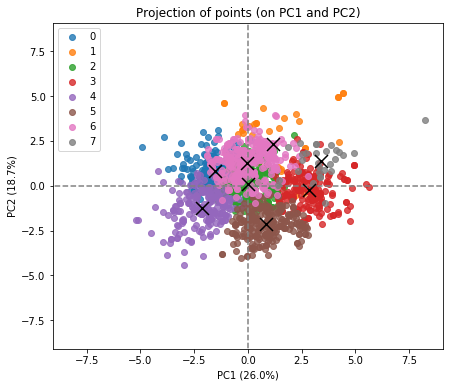

In [25]:
# applying the same pca reduction to our cluster centers
centres_reduced = pca.transform(kmeans.cluster_centers_)

display_factorial_planes(B_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)

Explanation of the graph above: it's not possible to visualize the 12 dimensions of our data in a graph.
Therefore, we have conducted a principal component analysis to represent the characteristics of the different wines in 2 dimensions only. 

These two dimensions, PC1 and PC2, cannot capture all of the difference between the wines, but they provide the best representation of the variances between the different wine characteristics that is possible in 2D. 

Between them, these 2 axes, PC1 and PC2, are able to capture 44.7 % of the variance between the characteristics of the wines, whereas we would expect 2 out of 12 dimensions to capture only 16.7%. 

We can also see that the clusters that we identified above appear quite clearly within this 2D projection, i.e. that even when we reduce the characteristics down to 2 using PCA, the cluster centers are in distinct locations and most of the points are clearly closer to the center of their own cluster than to the center of other clusters or to the mean point.

## Part 5: Determining the profile of the different clusters

Note: The parallel coordinate plots for the entire data sorted by clusters does not give a good result in terms of readability
compared to the parallel coordinate plot for the centroids. Therefore I have decided to represent the centroids directly.

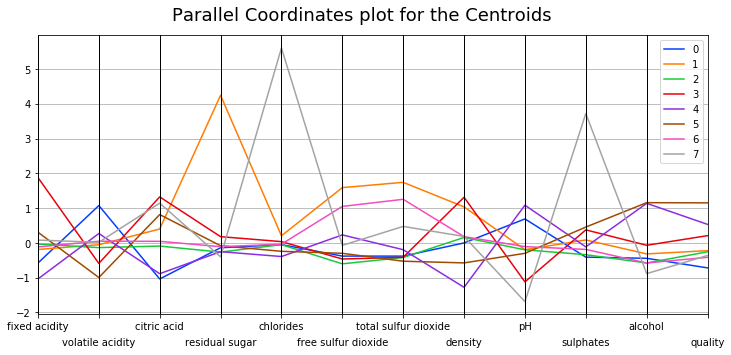

In [29]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=beverages.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

Description of each cluster:
* Wines in cluster 0 have high volatile acidity and above average PH, low levels of citric acid, and their quality is the lowest of all clusters
* Wines in cluster 1 are characterized by extremely high levels of residual sugar, high levels of free sulfur dioxide and total sulfur dioxide, and above average density
* Wines in cluster 2 have close to average values for all characteristics
* Wines in cluster 3 have high fixed acidity and levels of citrict acid, high density and low PH
* Wines in cluster 4 have low fixed acidity and levels of citric acid, low density, high PH, high levels of alcohol and their quality is good
* Wines in cluster 5 have low volatile acidity, above average levels of sulphates, high alcohol content and this is the cluster with the highest quality
* Wines in cluster 6 have high levels of free sulfur dioxide and total sulfur dioxide, most of their other values are close to average
* Wines in cluster 7 have high citric acid, extremely high levels of chlorides, very low pH, extremely high amounts of sulphates, and low alcohol content